<div style="text-align: center; font-size: 20px; color: orange;">
    <b>Diwali Sales Analysis</b>
</div>


<div style="text-align: center; font-size: 15px;">
<b><i>Problem Statement</i></b>
</div>
The retail company is seeking to enhance its customer experience and increase revenue during the Diwali sales period. Despite the significant volume of sales, there is a need to understand customer demographics, purchase behavior, and regional preferences to tailor marketing strategies effectively. 

<div style="text-align: center; font-size: 15px;">
<b><i>Objective</i></b>
</div>
The objective of this project is to analyze Diwali sales data to provide actionable insights that will:

1) Improve Customer Experience: By understanding customer demographics and behavior, the company can personalize marketing efforts and enhance service delivery.
2) Increase Revenue: By identifying high-value product categories, optimizing inventory, and tailoring regional strategies, the company can maximize sales and profitability.

<div style="text-align: center; font-size: 15px;">
<b><i>Research Questions</i></b>
</div>



   1) What are the key demographic characteristics of the customers (e.g., age, gender, marital status, occupation)?

   2) What are the average number of orders and the average amount spent per customer?


   3) Which states and zones have the highest customer concentration and spending?


   4) Which product categories generate the highest revenue?


   5) Can customers be segmented based on age, gender, order frequency, and spending?



<div style="text-align: center; font-size: 15px;">
<b><i>Analysis & Visualization</i></b>
</div>


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("F:\DataSets\Diwali_Sales_Analysis\Diwali_Sales_Data.csv", encoding='unicode_escape')

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [10]:
df.shape

(11251, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           0 non-null      int64  
 1   Cust_name         0 non-null      object 
 2   Product_ID        0 non-null      object 
 3   Gender            0 non-null      object 
 4   Age Group         0 non-null      object 
 5   Age               0 non-null      int64  
 6   Marital_Status    0 non-null      int64  
 7   State             0 non-null      object 
 8   Zone              0 non-null      object 
 9   Occupation        0 non-null      object 
 10  Product_Category  0 non-null      object 
 11  Orders            0 non-null      int64  
 12  Amount            0 non-null      float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 0.0+ bytes


In [67]:
df.isnull().sum()

User_ID             0.0
Cust_name           0.0
Product_ID          0.0
Gender              0.0
Age Group           0.0
Age                 0.0
Marital_Status      0.0
State               0.0
Zone                0.0
Occupation          0.0
Product_Category    0.0
Orders              0.0
Amount              0.0
Status              0.0
unnamed1            0.0
dtype: float64

In [63]:
df.dropna(inplace = True)

In [8]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)


Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
--------------------------------------------------
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
--------------------------------------------------
Gender
['F' 'M']
--------------------------------------------------
Age Group
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
--------------------------------------------------
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
--------------------------------------------------
Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern']
--------------------------------------------------
Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail' 'Hospitality' 'Aviation'
 'Agriculture' 'Textile

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [24]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


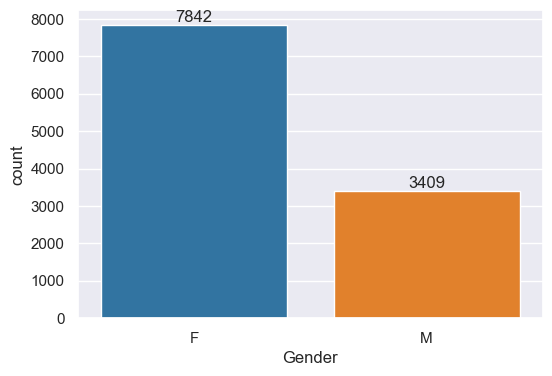

In [47]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'Gender',data = df,palette='tab10',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

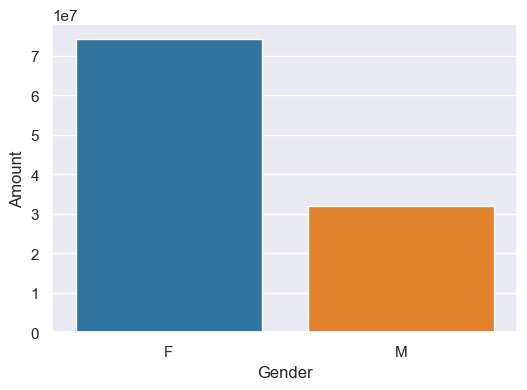

In [40]:
plt.figure(figsize = (6,4))
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen,palette='tab10',hue='Gender');



<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
1)The analysis reveals a significant gender disparity among buyers, with females constituting 69.7% of the customer base, compared to 30.3% for males. This indicates that the majority of purchasers are female.

2)Additionally, the purchasing power analysis indicates that females have a higher average spending per transaction compared to males, suggesting that not only are there more female buyers, but they also tend to spend more per purchase.

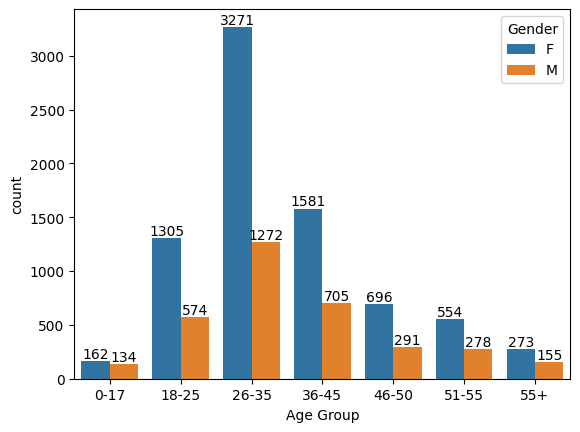

In [13]:
df_sorted = df.sort_values(by='Age Group')
ax1=sns.countplot(data=df_sorted,x='Age Group',hue='Gender')
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.show()


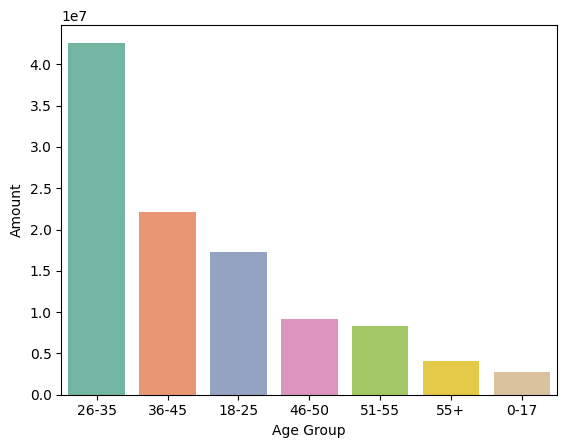

In [14]:

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,hue='Age Group', palette='Set2');



<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
The predominant age group of buyers is 26-35 years, representing 40.4% of the customer base, followed by the 36-45 age group at 20.3% and the 18-25 age group at 16.7%. Notably, females in the 26-35 age group constitute 30% of the total customer base. This indicates the importance of targeting young to middle-aged adults, particularly females, with products and marketing campaigns that resonate with their lifestyle and preferences.

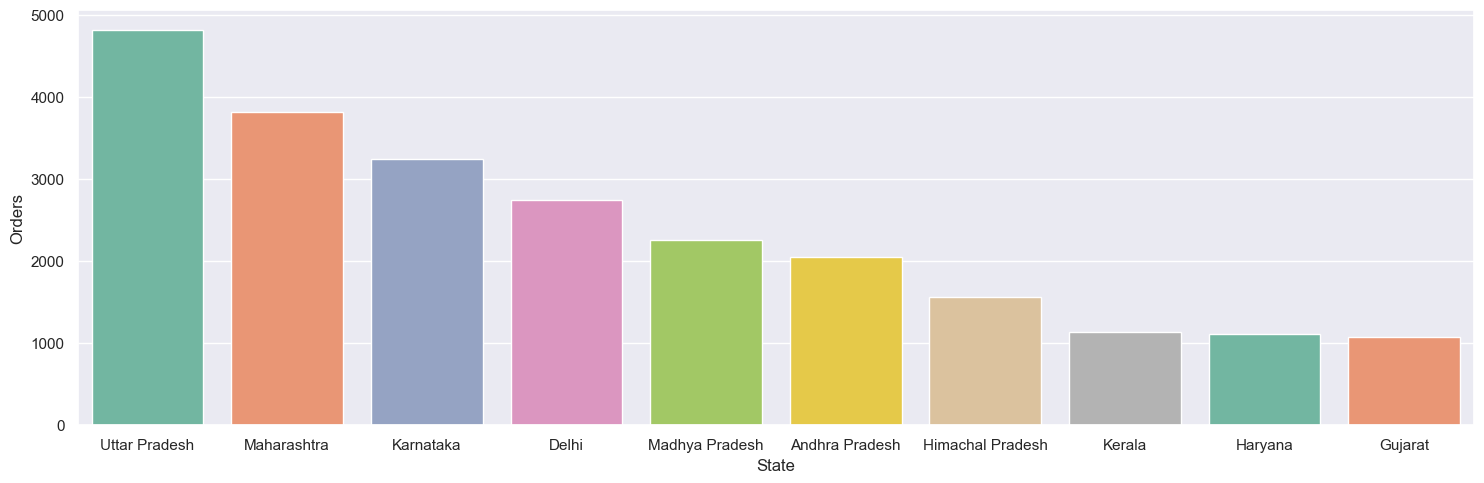

In [55]:

sns.set(rc={'figure.figsize':(15,5)})
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(x='State',y='Orders',data=sales_state, palette='Set2',hue='State')
plt.tight_layout();

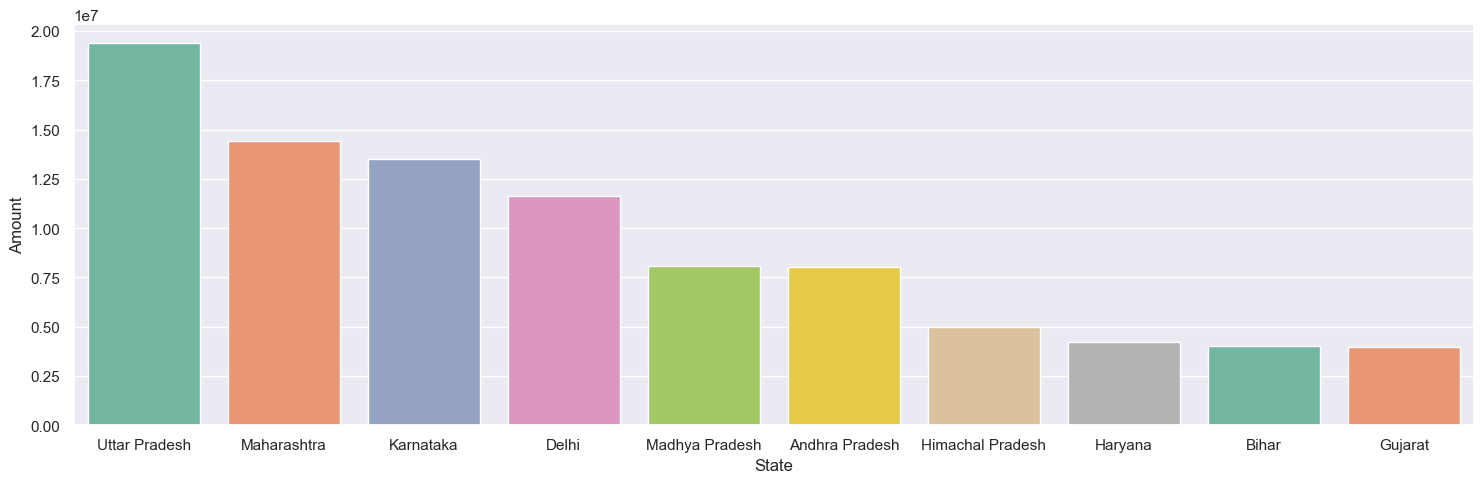

In [56]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette='Set2',hue='State')
plt.tight_layout();

<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
The state-wise distribution of customers indicates that the top states are Uttar Pradesh (17.3%), Maharashtra (13.6%), and Karnataka (11.6%). These states represent key markets and should be prioritized for targeted marketing campaigns and resource allocation to maximize sales and customer engagement in these regions.

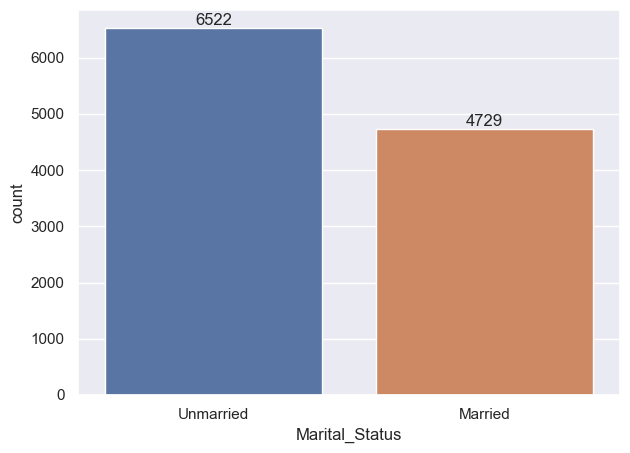

In [6]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Marital_Status')

df['Marital_Status'] = df['Marital_Status'].map({1: 'Married', 0: 'Unmarried'})

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

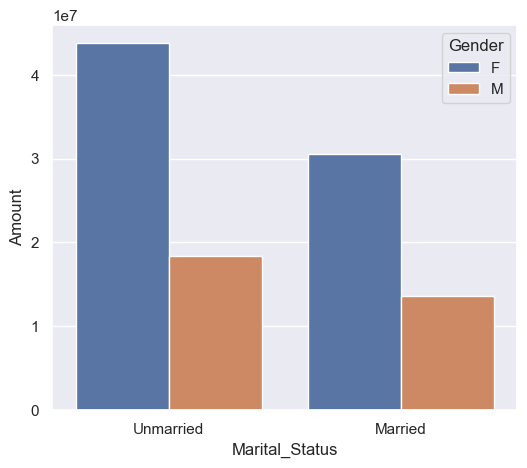

In [105]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_state['Marital_Status'] = sales_state['Marital_Status'].map({1: 'Married', 0: 'Unmarried'})
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender');

<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
The marital status distribution shows that 57.97% of the customers are single, while 42.03% are married. This implies that single individuals form a larger portion of the customer base, suggesting opportunities for personalized marketing strategies that cater to the unique needs and preferences of single customers.

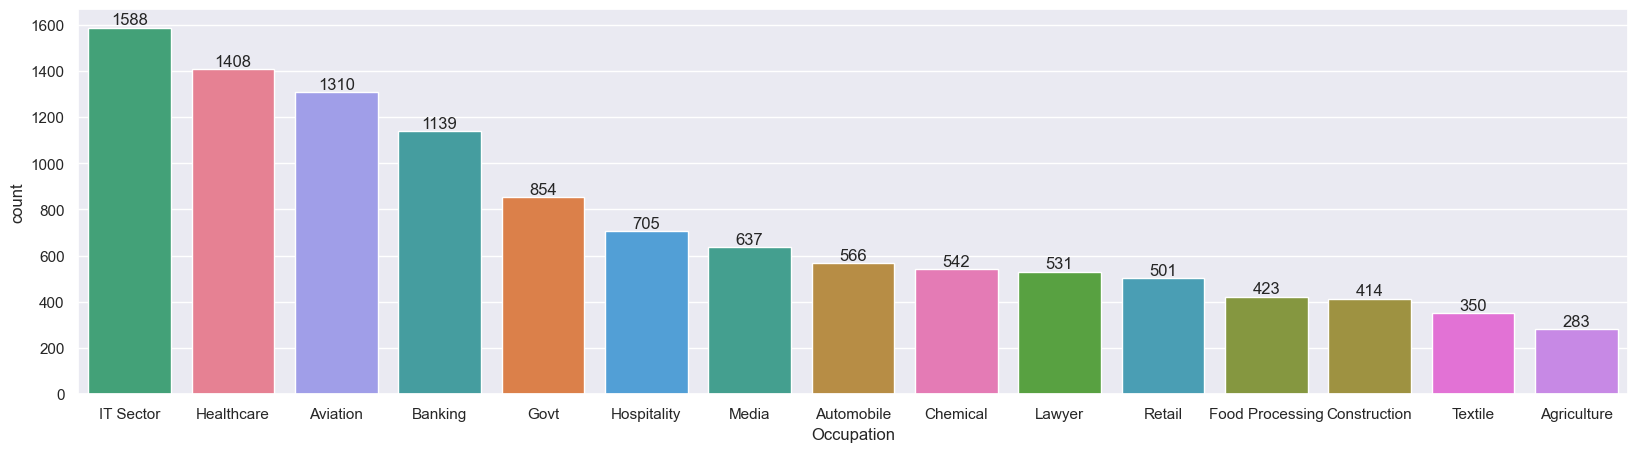

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation',order=df['Occupation'].value_counts().index)

for bars in ax.containers:
    ax.bar_label(bars)

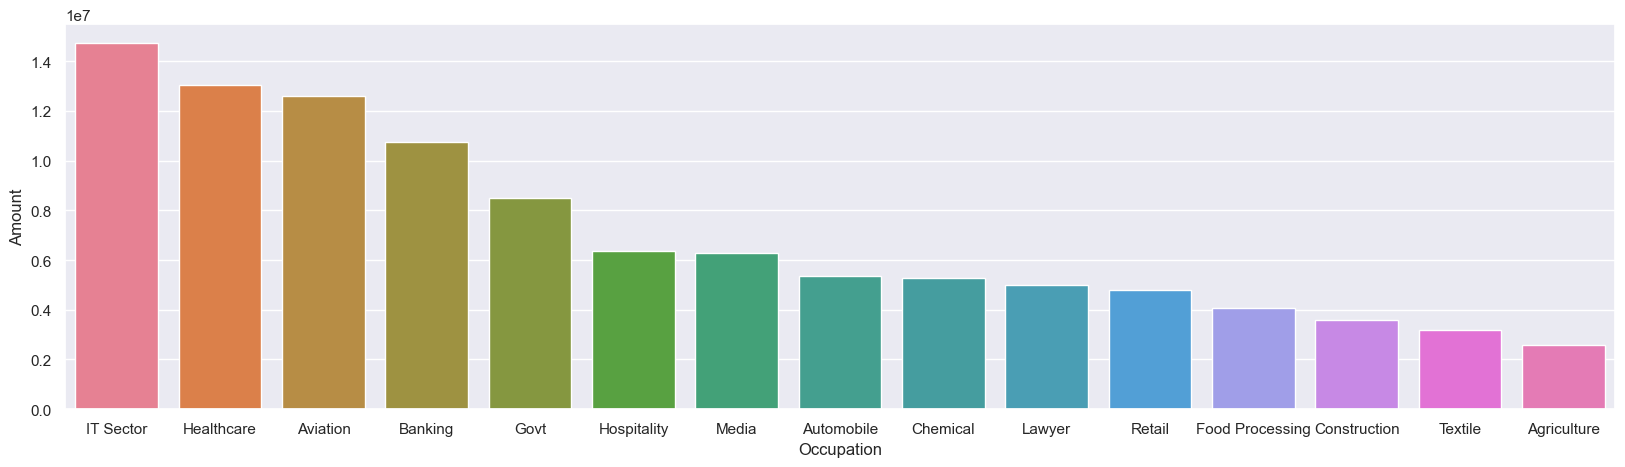

In [20]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',hue='Occupation');

<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
The occupation analysis shows that customers are predominantly from the IT sector (14.1%), followed by Healthcare (12.5%) and Aviation (11.6%). These occupational insights can be used to tailor marketing messages and product offerings that appeal to the professional interests and lifestyles of these segments.

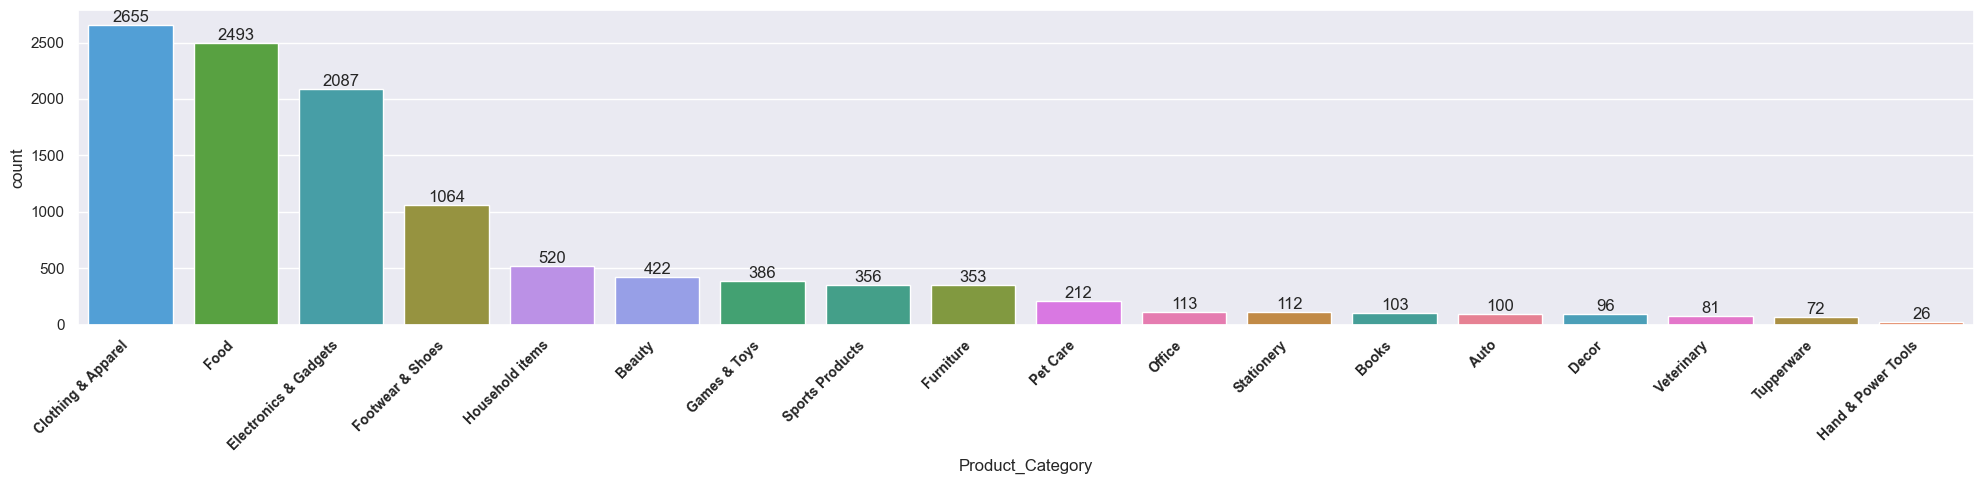

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category',order=df['Product_Category'].value_counts().index)

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45,ha='right')
plt.xticks(fontsize=10, fontweight='bold')
plt.tight_layout()

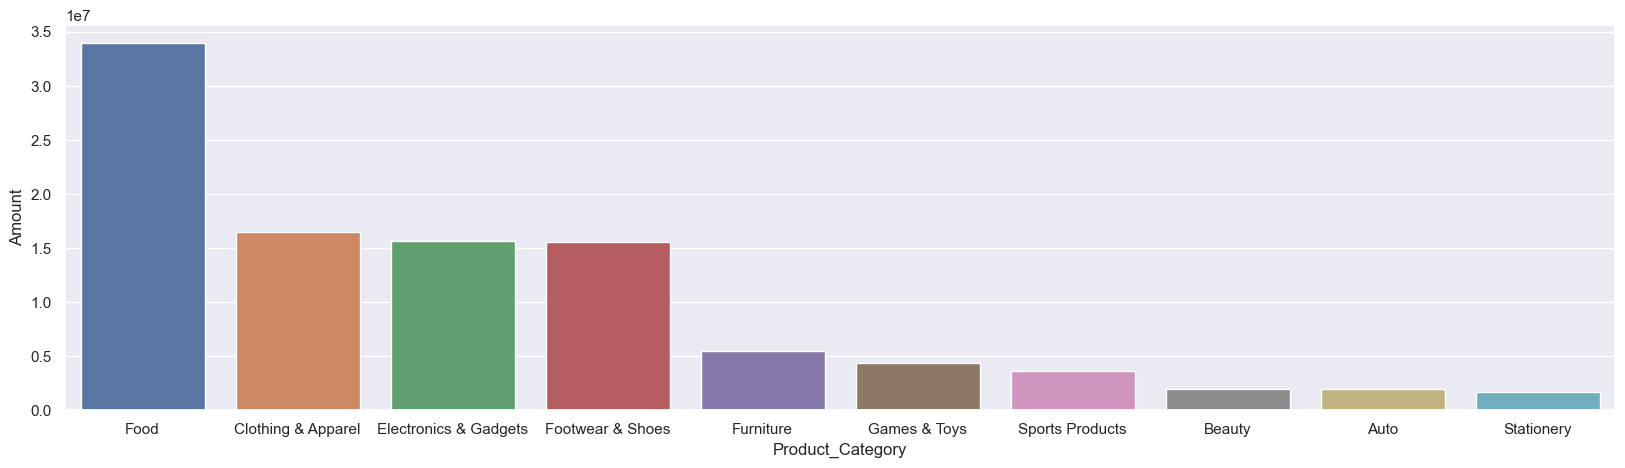

In [33]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category');

<div style="text-align: center; font-size: 15px;">
<b><i>Observation</i></b>
</div>
 The most preferred product categories are Clothing & Apparel (23.6%), Food (22.2%), and Electronics & Gadgets (18.5%). This indicates a strong inclination towards these categories, suggesting that enhancing product variety and availability in these segments could drive higher sales and customer satisfaction.

<div style="text-align: center; font-size: 15px;">
<b><i>Recommendations</i></b>
</div>
 

1. **Enhancing Customer Experien**
   - **Personalized Marketing**: Tailor marketing campaigns to different customer segments. For example, target the 26-35 age group with promotions on popular categories like Clothing & Apparel and Electronics & Gadgets.
   - **Loyalty Programs**: Implement loyalty programs focusing on high-value customers and frequent buyers. Reward repeat purchases to encourage loyalty.
   - **Customer Feedback**: Collect and analyze customer feedback to identify pain points and areas for improvement in product offerings and service.

2. **Increasing Revenue**
   - **Promotional Strategies**:
     - Offer discounts and bundles on top product categories such as Food and Clothing & Apparel.
     - Conduct targeted promotions during peak seasons and festivals, emphasizing products preferred by high-spending regions.
   - **Product Expansion**:
     - Introduce new products in high-demand categories.
     - Expand offerings in states and zones with higher average spending to capture more market share.
   - **Cross-Selling and Upselling**:
     - Recommend complementary products based on customer purchase history.
     - Encourage customers to purchase higher-value items through strategic product placements and promotions.

3. **Operational Improvements**
   - **Inventory Management**: Ensure popular products are well-stocked, particularly in high-demand regions, to prevent stockouts and lost sales.
   - **Customer Support**: Enhance customer support services to resolve issues quickly and improve overall satisfaction.
   - **Regional Focus**: Allocate more resources to states and zones with higher spending to maximize returns and build stronger customer relationships in those areas.

